In [1]:
import janitor
import matplotlib.pyplot as plt
import missingno
import numpy as np
import pandas as pd
import pyreadr
import seaborn as sns
import session_info
import upsetplot

%run pandas-missing-extension.ipynb

base_url = "https://github.com/njtierney/naniar/raw/master/data/"
datasets_names = ("oceanbuoys", "pedestrian", "riskfactors")
extension = ".rda"

datasets_dfs = {}

for dataset_name in datasets_names:

    dataset_file = f"{ dataset_name }{ extension }"
    dataset_output_file = f"./data/{ dataset_file }"
    dataset_url = f"{ base_url }{ dataset_file }"
    
    !wget -q -O { dataset_output_file } { dataset_url }

    datasets_dfs[f"{ dataset_name }_df"] = pyreadr.read_r(dataset_output_file).get(dataset_name)

datasets_dfs.keys()

locals().update(**datasets_dfs)
del datasets_dfs

## General

In [2]:
print(oceanbuoys_df.size) # El tamaño de mi dataset es de 5888
print(oceanbuoys_df.shape) # Tenemos 736 observaciones y 8 variables 

5888
(736, 8)


In [3]:
oceanbuoys_df.missing.number_complete(), oceanbuoys_df.missing.number_missing() # Tenemos 5711 datos completos y 177 datos faltantes explicitos

(5711, 177)

## General por variable

In [4]:
oceanbuoys_df.missing.missing_variable_summary() # Tenemos 3 variables con datos faltantes: 'humidity' con 93, 'air_temp_c' con 81 y 'sea_temp_c' con 3

,variable,n_missing,n_cases,pct_missing
0,year,0,736,0.000000
1,latitude,0,736,0.000000
2,longitude,0,736,0.000000
3,sea_temp_c,3,736,0.407609
4,air_temp_c,81,736,11.005435
5,humidity,93,736,12.635870
6,wind_ew,0,736,0.000000
7,wind_ns,0,736,0.000000


In [5]:
oceanbuoys_df.missing.missing_variable_table() # Al agrupar las variables en una tabla nos damos cuenta que hay 5 variables con 0 datos faltantes aparentemente

,n_missing_in_variable,n_variables,pct_variables
0,0,5,62.5
1,3,1,12.5
2,81,1,12.5
3,93,1,12.5


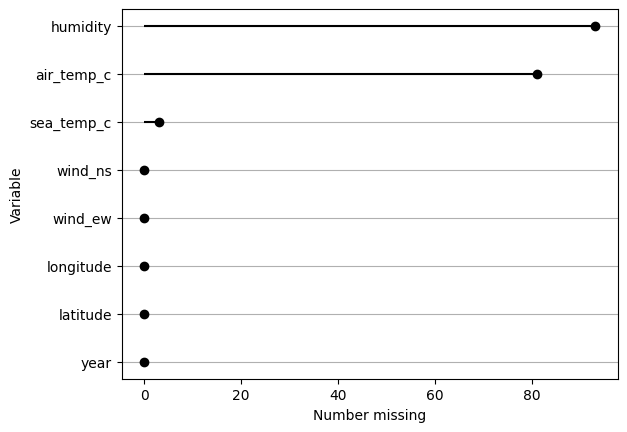

In [6]:
oceanbuoys_df.missing.missing_variable_plot() # Visualizamos para apreciar mejor nuestra cantidad de datos faltantes

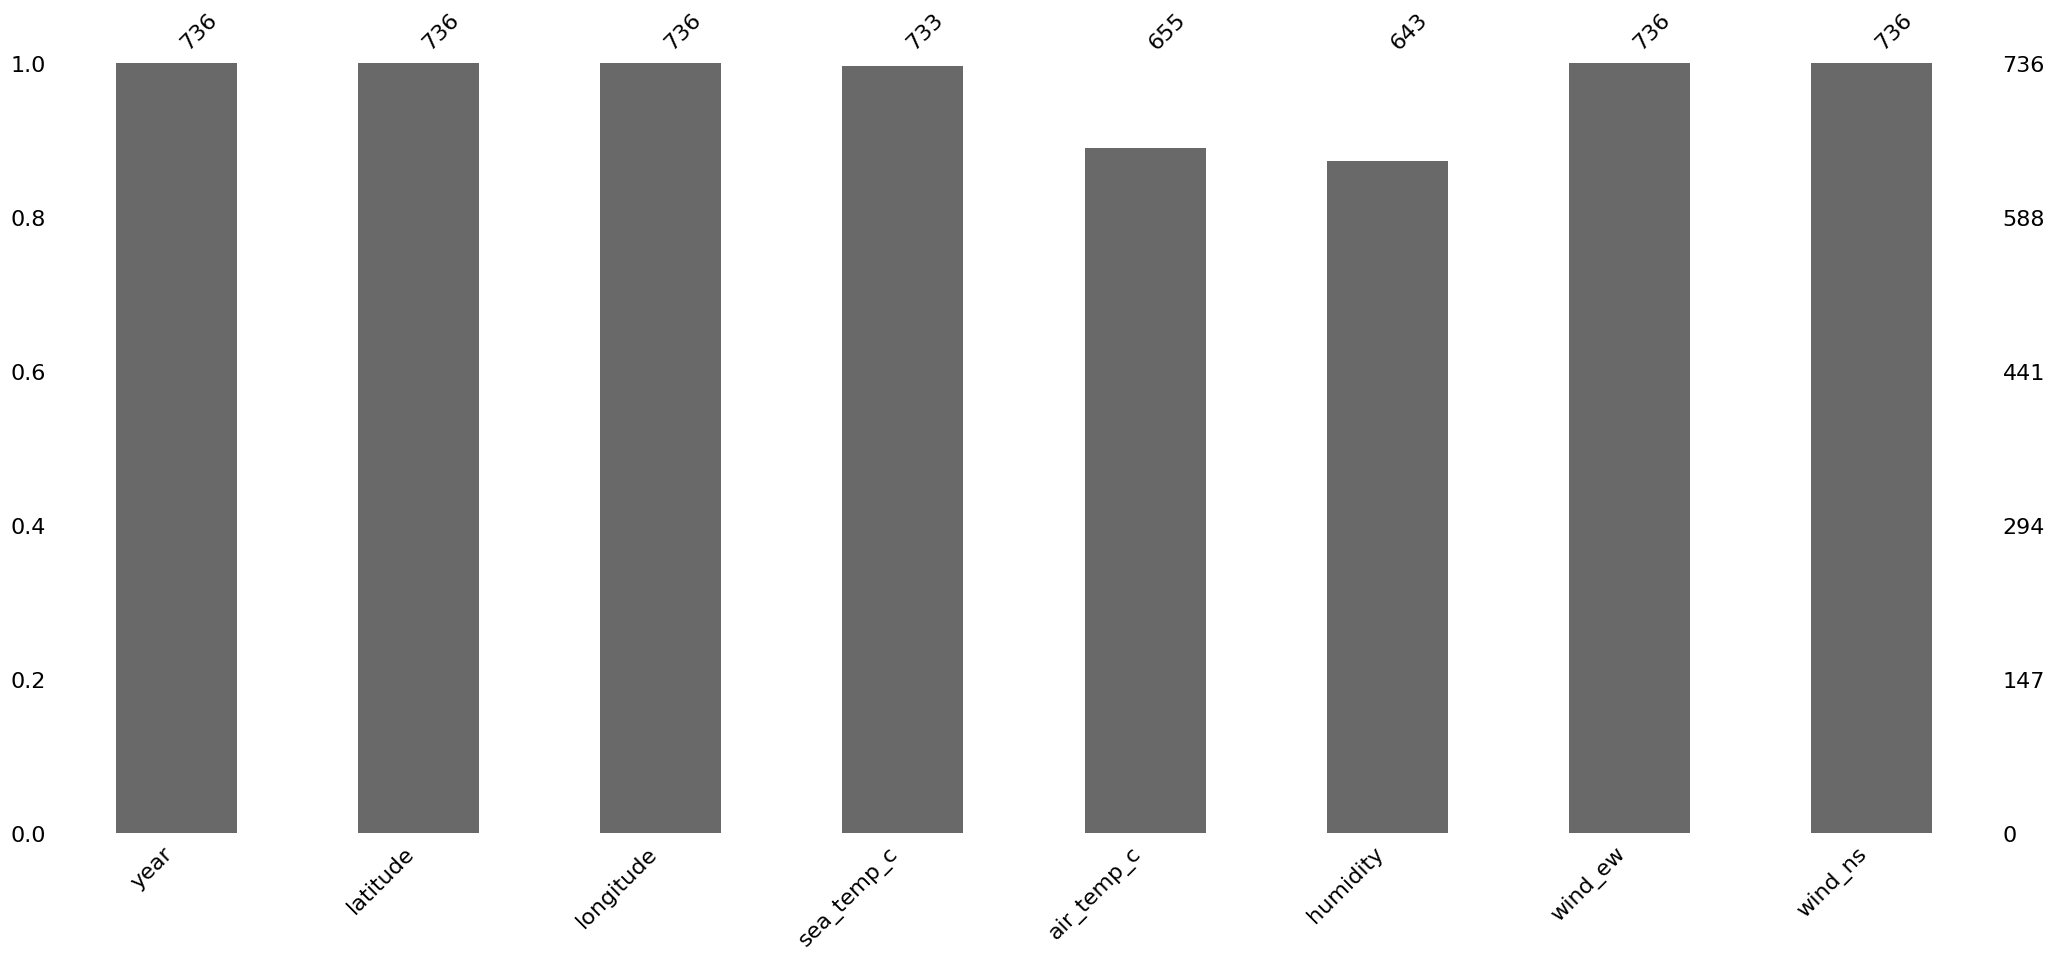

In [7]:
missingno.bar(df=oceanbuoys_df); # Otra grafica para visualizar mejor mis datos completos y datos faltantes para cada variable

## General por observacion

In [8]:
oceanbuoys_df.missing.missing_case_summary()

,case,n_missing,pct_missing
0,0,0,0.0
1,1,0,0.0
2,2,0,0.0
3,3,0,0.0
4,4,0,0.0
...,...,...,...
731,731,0,0.0
732,732,0,0.0
733,733,0,0.0
734,734,0,0.0


In [9]:
oceanbuoys_df.missing.missing_case_table() # Tenemos 565 casos en los que tenemos datos completos, tenemos 167 casos donde nos falta un dato, tenemos dos casos en las que nos faltan dos datos y tenemos 2 casos en las cuales nos hacen falta 3 datos

,n_missing_in_case,n_cases,pct_case
0,0,565,76.766304
1,1,167,22.690217
2,2,2,0.271739
3,3,2,0.271739


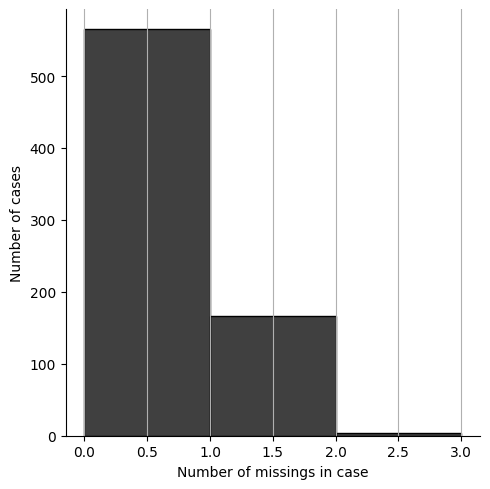

In [10]:
oceanbuoys_df.missing.missing_case_plot() # Podemos apreciar mejor mediante este grafico nuestra cantidad de datos faltantes por caso

## General extra

In [11]:
oceanbuoys_df.missing.missing_variable_span(variable='humidity', span_every=100) # Mis datos faltantes en la variable humidity se acumulan en el intervalo entre los casos 500 y 700

,span_counter,n_missing,n_complete,pct_missing,pct_complete
0,0,0,100,0.0,100.0
1,1,0,100,0.0,100.0
2,2,0,100,0.0,100.0
3,3,0,100,0.0,100.0
4,4,41,59,41.0,59.0
5,5,52,48,52.0,48.0
6,6,0,100,0.0,100.0
7,7,0,36,0.0,100.0


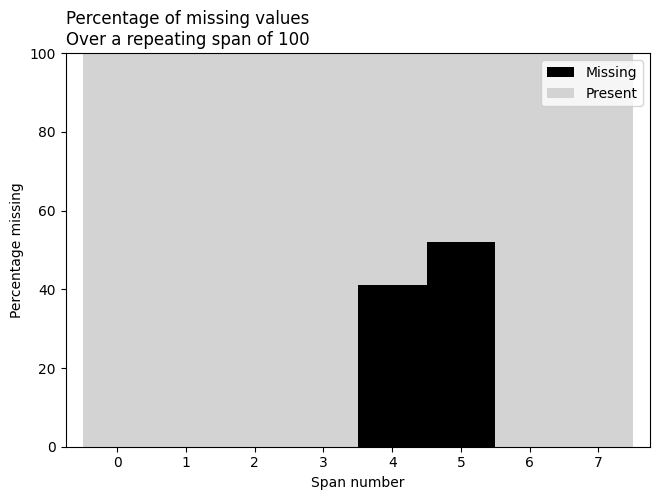

In [12]:
oceanbuoys_df.missing.missing_variable_span_plot(variable='humidity', span_every=100) # La visualizacion nos permite concluir que la cantidad de datos faltantes para la variables humidity se acumulan entre los casos 450 y 650

In [13]:
oceanbuoys_df.missing.missing_variable_run(variable='humidity') # Esta funcion nos permite determinar finalmente que tenemos datos faltantes para los casos desde el 459 al 551 y estan seguidos.

,run_length,is_na
0,459,complete
1,93,missing
2,184,complete


In [14]:
oceanbuoys_df.missing.missing_variable_span(variable='air_temp_c', span_every=100) # Mis datos faltantes en la variable air_temp_c se acumulan 77 en el intervalo entre los casos 100 y 200, 3 se acumulan en el rango del caso 500 al 600 y 1 entre el caso 600 y 700

,span_counter,n_missing,n_complete,pct_missing,pct_complete
0,0,0,100,0.0,100.0
1,1,77,23,77.0,23.0
2,2,0,100,0.0,100.0
3,3,0,100,0.0,100.0
4,4,3,97,3.0,97.0
5,5,0,100,0.0,100.0
6,6,1,99,1.0,99.0
7,7,0,36,0.0,100.0


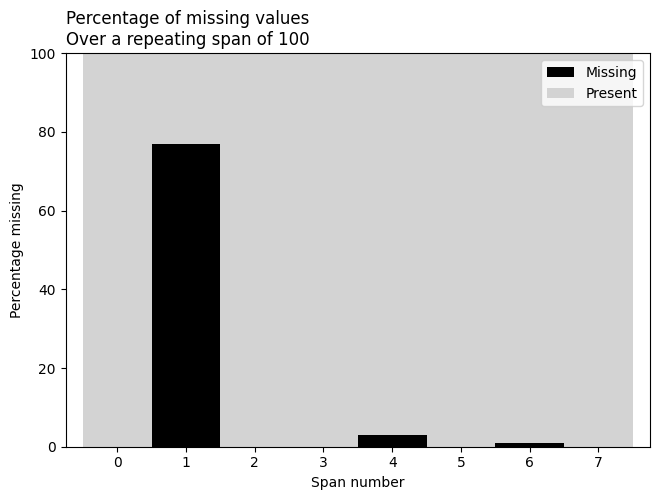

In [15]:
oceanbuoys_df.missing.missing_variable_span_plot(variable='air_temp_c', span_every=100) # Con esta visualizacion podemos concluir que del caso 100 al 200 tenemos un poco menos de 80 casos con datos faltantes, del caso 400 al 500 tenemos menos de 5 casos con datos faltantes y del caso 600 al 700 tenemos 1 caso con un dato faltante

In [16]:
oceanbuoys_df.missing.missing_variable_run(variable='air_temp_c') # Con este metodo nos damos cuenta que los casos desde el 107 hasta el 183, caso 459, caso 462, caso 480 y caso 636 tienen datos faltantes en la variable air_temp_c

,run_length,is_na
0,107,complete
1,77,missing
2,275,complete
3,1,missing
4,2,complete
5,1,missing
6,17,complete
7,1,missing
8,155,complete
9,1,missing


In [17]:
oceanbuoys_df.missing.missing_variable_span(variable='sea_temp_c', span_every=100) # Mis datos faltantes en la variable sea_temp_c se acumulan 2 entre los casos 400 y 500 y 1 se aparece entre los casos 600 y 700

,span_counter,n_missing,n_complete,pct_missing,pct_complete
0,0,0,100,0.0,100.0
1,1,0,100,0.0,100.0
2,2,0,100,0.0,100.0
3,3,0,100,0.0,100.0
4,4,2,98,2.0,98.0
5,5,0,100,0.0,100.0
6,6,1,99,1.0,99.0
7,7,0,36,0.0,100.0


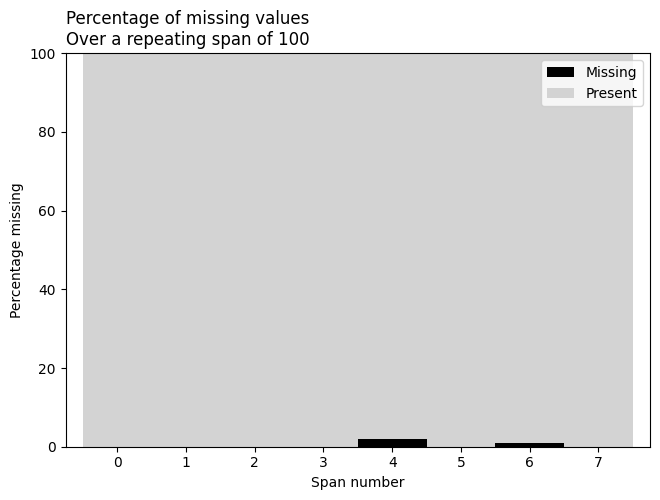

In [18]:
oceanbuoys_df.missing.missing_variable_span_plot(variable='sea_temp_c', span_every=100)

In [19]:
oceanbuoys_df.missing.missing_variable_run(variable='sea_temp_c') # Con este metodo nos damos cuenta que los casos 462, 480 y 636 presentan un valor faltante en la variable sea_temp_c

,run_length,is_na
0,462,complete
1,1,missing
2,17,complete
3,1,missing
4,155,complete
5,1,missing
6,99,complete


## Visualizacion para observar comportamientos llamativos

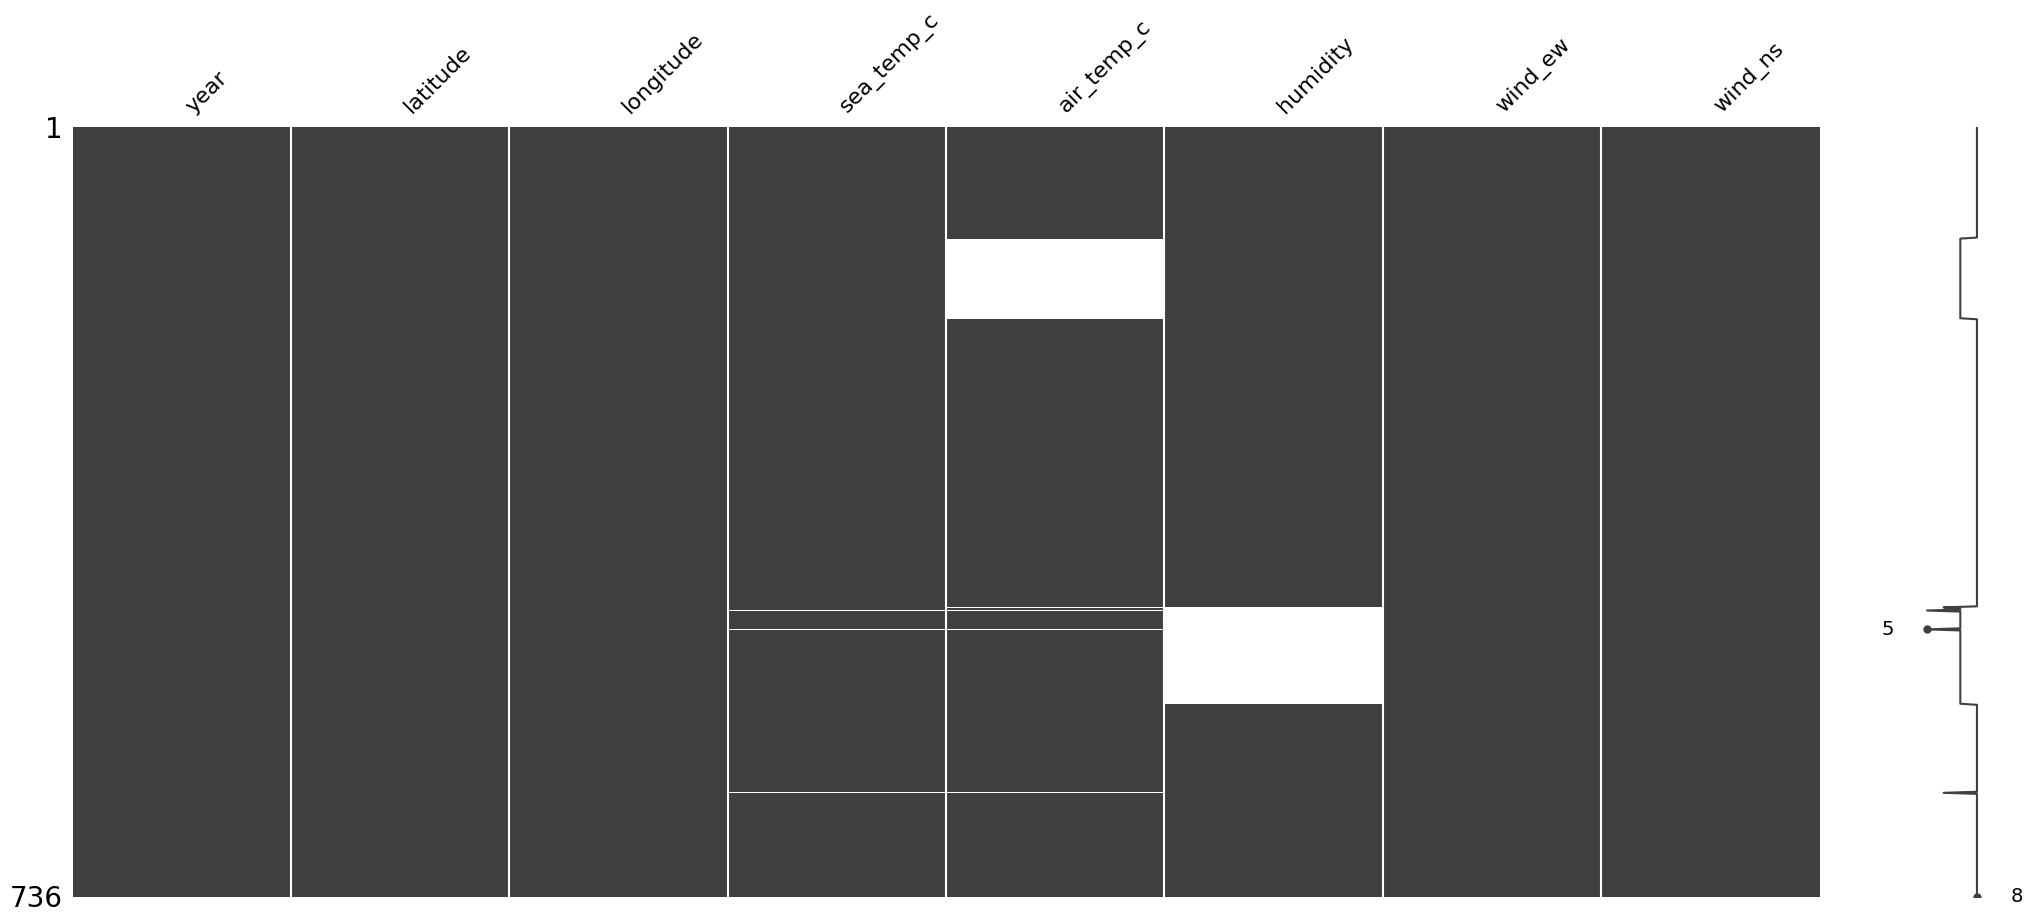

In [20]:
missingno.matrix(df=oceanbuoys_df); # Esta grafica nos permite apreciar que hay casos en los que tenemos datos faltantes en diferentes variables para la misma observacion 

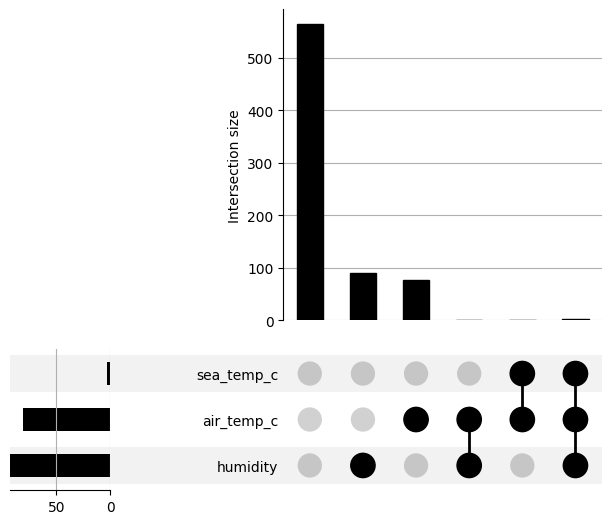

In [21]:
oceanbuoys_df.missing.missing_upsetplot(variables=['humidity','air_temp_c','sea_temp_c'], element_size=50); # Con esta grafica corroboramos las relaciones que existen en los datos faltantes de las 3 variables.

# Hay una pequeña cantidad de casos donde se comparten datos faltantes en las 3 variables al tiempo en una misma observacion: esto vendria siendo representado por la ultima columna donde estan sombreados los 3 puntos.
# El punto sombreado significa la ausencia de datos 

## Revision de valores faltantes implicitos

In [22]:
oceanbuoys_df.dtypes # Me doy cuenta que todas mis variables son de tipo float64

year          float64
latitude      float64
longitude     float64
sea_temp_c    float64
air_temp_c    float64
humidity      float64
wind_ew       float64
wind_ns       float64
dtype: object

In [23]:
print(oceanbuoys_df.year.unique())
print(oceanbuoys_df.latitude.unique())
print(oceanbuoys_df.longitude.unique()) # Sabemos que las variables year, latitude y longitud aparentemente no tienen datos faltantes ni explicitos ni implicitos

[1997. 1993.]
[ 0. -5. -2.]
[-110.  -95.]


In [24]:
oceanbuoys_df.humidity.unique() # La variable humidity aparentemente solo tiene datos faltantes explicitos

array([79.59999847, 75.80000305, 76.5       , 76.19999695, 76.40000153,
       76.69999695, 78.30000305, 78.59999847, 76.90000153, 77.59999847,
       77.5       , 80.09999847, 85.19999695, 79.80000305, 76.30000305,
       81.80000305, 84.59999847, 81.30000305, 84.69999695, 83.90000153,
       79.19999695, 80.40000153, 82.5       , 81.5       , 81.        ,
       80.69999695, 77.        , 86.69999695, 87.19999695, 82.59999847,
       91.09999847, 86.59999847, 87.        , 89.30000305, 88.90000153,
       83.80000305, 78.90000153, 78.5       , 85.59999847, 82.09999847,
       82.80000305, 89.40000153, 90.30000305, 83.40000153, 86.5       ,
       86.90000153, 89.80000305, 86.30000305, 86.80000305, 86.09999847,
       90.40000153, 88.        , 88.09999847, 90.19999695, 81.90000153,
       82.30000305, 87.09999847, 88.19999695, 89.59999847, 88.5       ,
       91.30000305, 85.80000305, 92.09999847, 89.90000153, 86.        ,
       90.90000153, 89.        , 90.09999847, 87.59999847, 85.30

In [25]:
oceanbuoys_df.wind_ew.unique() # Sabemos que la variable wind_ew aparentemente no tiene datos faltantes ni explicitos ni implicitos

array([-6.4000001 , -5.30000019, -5.0999999 , -4.9000001 , -3.5       ,
       -4.4000001 , -2.        , -3.70000005, -4.19999981, -3.5999999 ,
       -4.80000019, -1.        , -1.5       , -2.5999999 , -5.80000019,
       -7.30000019, -6.30000019, -3.20000005, -2.20000005, -5.69999981,
       -6.5999999 , -4.5999999 , -2.9000001 , -3.        , -5.        ,
       -6.5       , -1.39999998,  0.        , -1.29999995, -4.0999999 ,
       -1.79999995, -3.9000001 ,  1.20000005, -4.        , -2.4000001 ,
       -0.89999998, -3.79999995, -5.5999999 , -2.0999999 ,  0.2       ,
       -7.19999981, -7.9000001 , -5.4000001 ,  0.1       ,  0.80000001,
       -0.40000001, -1.89999998, -3.0999999 ,  1.79999995, -2.79999995,
       -0.30000001, -2.5       , -3.29999995, -4.5       , -2.29999995,
       -1.20000005,  0.89999998, -1.10000002, -0.60000002, -0.1       ,
        1.29999995, -0.69999999, -1.60000002, -2.70000005, -4.69999981,
       -3.4000001 ,  2.0999999 ,  0.60000002,  1.60000002, -5.19

In [26]:
oceanbuoys_df.wind_ns.unique() # Sabemos que la variable wind_ns aparentemente no tiene datos faltantes ni explicitos ni implicitos

array([ 5.4000001 ,  5.30000019,  4.5       ,  2.5       ,  4.0999999 ,
        1.60000002,  3.5       ,  5.        ,  2.9000001 ,  1.79999995,
        1.89999998,  0.89999998,  0.69999999,  3.29999995,  3.79999995,
        4.69999981,  6.80000019,  6.69999981,  1.5       ,  4.        ,
        4.19999981,  2.4000001 ,  4.30000019,  2.5999999 ,  2.29999995,
        2.79999995,  3.5999999 , -1.29999995,  3.        ,  3.20000005,
        0.1       ,  2.20000005,  1.20000005, -1.10000002, -0.1       ,
        0.5       , -0.89999998, -4.        , -2.29999995, -6.19999981,
       -4.4000001 , -1.        , -1.39999998, -0.40000001, -1.70000005,
       -3.70000005, -2.4000001 , -0.80000001,  3.9000001 ,  0.80000001,
       -0.69999999, -1.60000002, -1.5       ,  2.0999999 ,  0.30000001,
       -1.20000005,  4.9000001 ,  6.        ,  6.0999999 ,  6.9000001 ,
        6.4000001 ,  5.0999999 ,  3.4000001 ,  5.80000019,  5.5999999 ,
        6.5       ,  2.70000005,  5.5       ,  6.19999981,  7.19

In [27]:
oceanbuoys_df.air_temp_c.unique() # La variable air_temp_c aparentemente solo tiene datos faltantes explicitos

array([27.14999962, 27.02000046, 27.        , 26.93000031, 26.84000015,
       26.94000053, 27.04000092, 27.11000061, 27.20999908, 27.25      ,
       27.22999954, 27.31999969, 27.30999947, 26.44000053, 26.78000069,
       27.42000008, 27.5       , 27.09000015, 27.29000092, 27.05999947,
       27.28000069, 27.29999924, 27.51000023, 27.54000092, 27.62000084,
       27.60000038, 27.63999939, 27.55999947, 27.52000046, 26.80999947,
       27.18000031, 27.84000015, 25.76000023, 26.37999916, 26.87999916,
       26.29000092, 27.17000008, 26.21999931, 27.78000069, 27.64999962,
       26.57999992, 27.21999931, 27.20000076, 27.68000031, 26.59000015,
       27.27000046, 26.52000046, 27.23999977, 27.39999962, 26.77000046,
       27.48999977, 27.73999977, 28.37000084, 28.28000069, 26.42000008,
       27.62999916, 28.10000038, 27.32999992, 26.90999985, 28.07999992,
       26.97999954, 27.12999916, 26.82999992, 27.87000084, 26.89999962,
       27.54999924, 27.80999947, 28.39999962, 27.67000008, 27.95

In [28]:
oceanbuoys_df.sea_temp_c.unique() # La variable sea_temp_c aparentemente solo tiene datos faltantes explicitos

array([27.59000015, 27.54999924, 27.56999969, 27.62000084, 27.64999962,
       27.82999992, 28.01000023, 28.04000092, 28.02000046, 28.04999924,
       28.06999969, 28.09000015, 28.20000076, 28.25      , 28.42000008,
       28.57999992, 28.52000046, 28.35000038, 28.28000069, 28.18000031,
       28.05999947, 28.12000084, 28.12999916, 28.11000061, 28.14999962,
       28.19000053, 28.17000008, 28.20999908, 28.26000023, 28.22999954,
       28.31999969, 28.03000069, 28.47999954, 28.55999947, 28.59000015,
       28.45999908, 28.54999924, 28.51000023, 28.71999931, 28.97999954,
       28.56999969, 28.5       , 28.53000069, 28.72999954, 29.02000046,
       28.94000053, 28.86000061, 28.78000069, 28.82999992, 29.07999992,
       28.90999985, 28.73999977, 28.64999962, 28.62999916, 29.        ,
       29.09000015, 28.76000023, 29.03000069, 28.65999985, 28.70000076,
       28.88999939, 28.81999969, 28.89999962, 29.04000092, 29.05999947,
       29.21999931, 29.32999992, 29.29000092, 29.40999985, 29.54

## Tipos de valores faltantes

### Missing completely at Random ( MCAR )

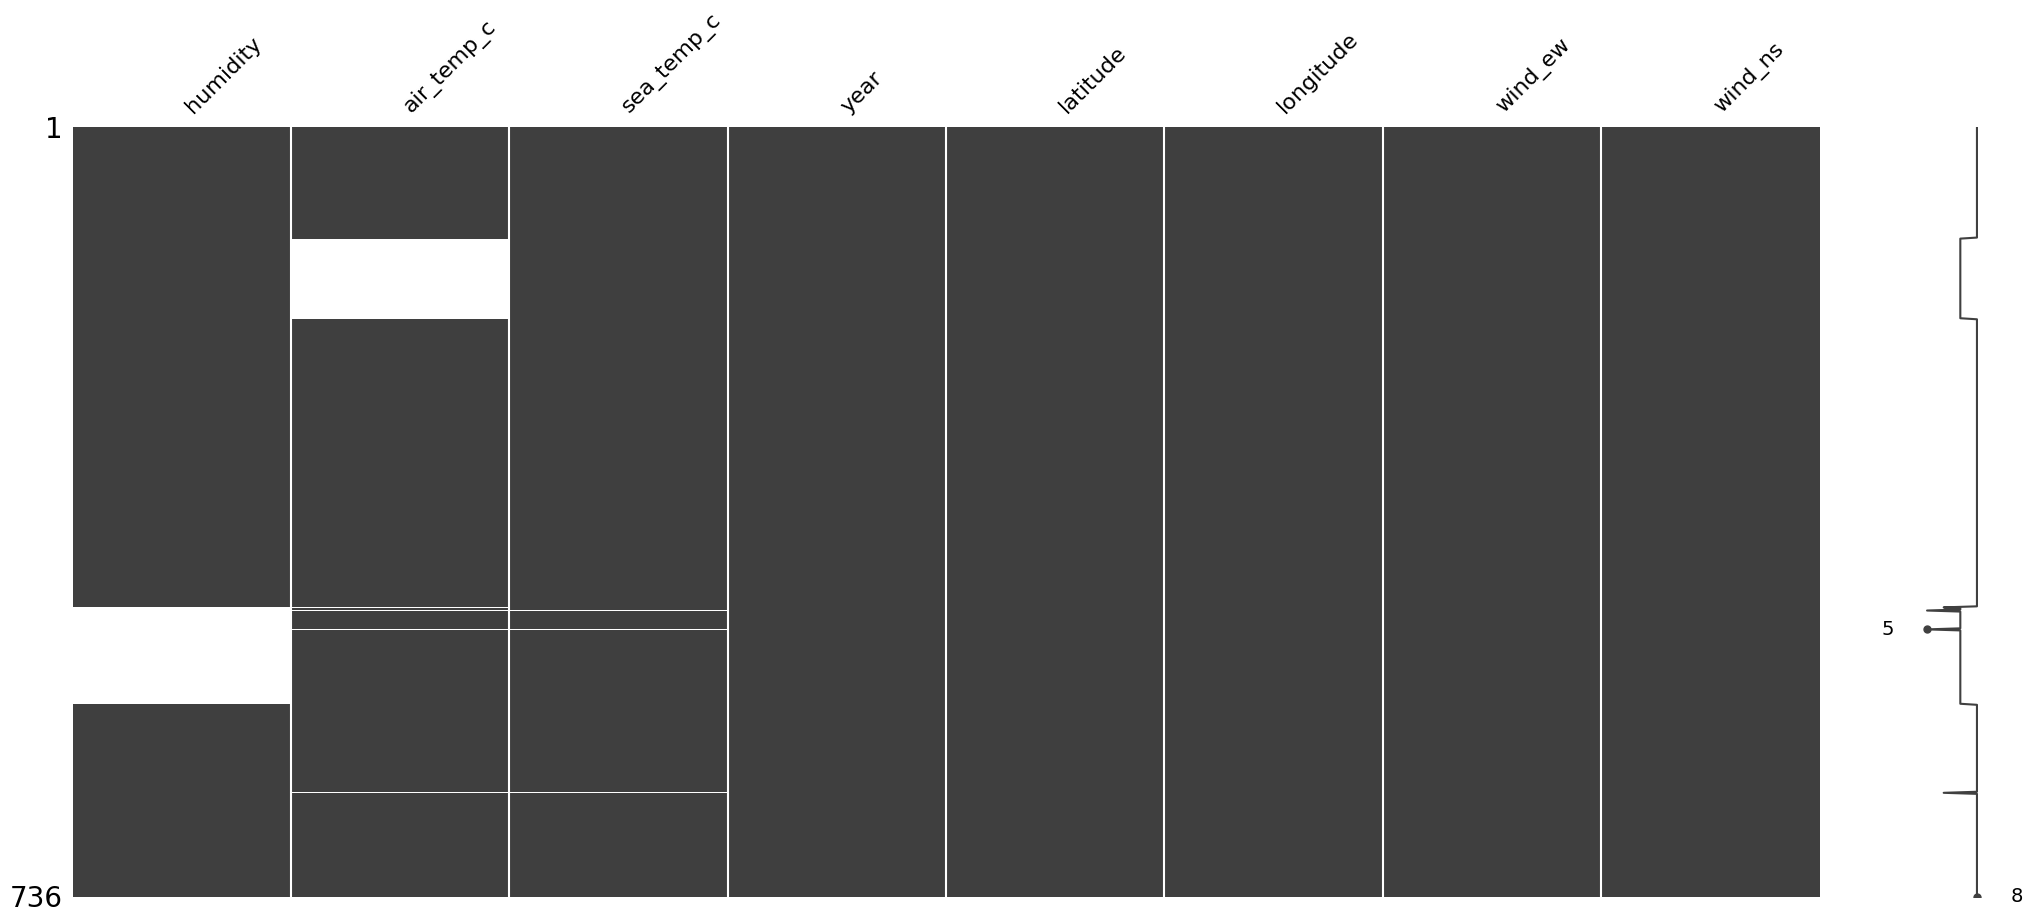

In [29]:
oceanbuoys_df.missing.sort_variables_by_missingness().pipe(missingno.matrix); # Nos damos cuenta que la variable sea_temp_c tiene muy pocos datos faltantes, de esto podemos concluir que esta variable es de tipo MCAR

## Shadow Matrix

In [30]:
oceanbuoys_df.missing.bind_shadow_matrix(only_missing=True)

,year,latitude,longitude,sea_temp_c,air_temp_c,humidity,wind_ew,wind_ns,sea_temp_c_NA,air_temp_c_NA,humidity_NA
0,1997.0,0.0,-110.0,27.590000,27.150000,79.599998,-6.4,5.4,Not Missing,Not Missing,Not Missing
1,1997.0,0.0,-110.0,27.549999,27.020000,75.800003,-5.3,5.3,Not Missing,Not Missing,Not Missing
2,1997.0,0.0,-110.0,27.570000,27.000000,76.500000,-5.1,4.5,Not Missing,Not Missing,Not Missing
3,1997.0,0.0,-110.0,27.620001,26.930000,76.199997,-4.9,2.5,Not Missing,Not Missing,Not Missing
4,1997.0,0.0,-110.0,27.650000,26.840000,76.400002,-3.5,4.1,Not Missing,Not Missing,Not Missing
...,...,...,...,...,...,...,...,...,...,...,...
731,1993.0,-2.0,-110.0,24.780001,24.620001,90.800003,-4.4,1.7,Not Missing,Not Missing,Not Missing
732,1993.0,-2.0,-110.0,24.879999,24.500000,91.099998,-3.0,0.2,Not Missing,Not Missing,Not Missing
733,1993.0,-2.0,-110.0,25.120001,24.889999,89.699997,-4.0,1.1,Not Missing,Not Missing,Not Missing
734,1993.0,-2.0,-110.0,25.160000,24.930000,89.500000,-4.3,2.5,Not Missing,Not Missing,Not Missing


### Agrupacion de valores faltantes y completos para comparar directamente con otras variables y revisar estadisticos y visualizaciones utilizando la Shadow Matrix

In [31]:
oceanbuoys_df.missing.bind_shadow_matrix(only_missing=True).groupby('humidity_NA')['wind_ew'].describe().reset_index() # Agrupamos por valores faltantes y completos de la variable wind_ew y revisamos estadisticos para ambos grupos de la variable wind_ew 

,humidity_NA,count,mean,std,min,25%,50%,75%,max
0,Missing,93.0,-3.297849,2.308255,-7.3,-5.0,-3.2,-2.0,3.3
1,Not Missing,643.0,-3.776361,1.897424,-8.1,-5.1,-4.0,-2.7,4.3


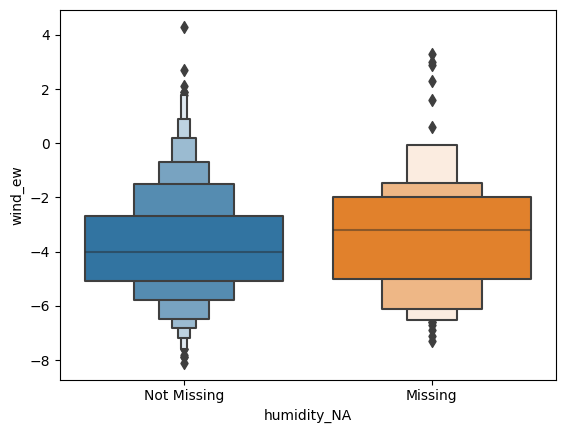

In [32]:
oceanbuoys_df.missing.bind_shadow_matrix(only_missing=True).pipe(lambda df: {sns.boxenplot(data=df, x='humidity_NA', y='wind_ew')}); # Este grafico explica la linea anterior

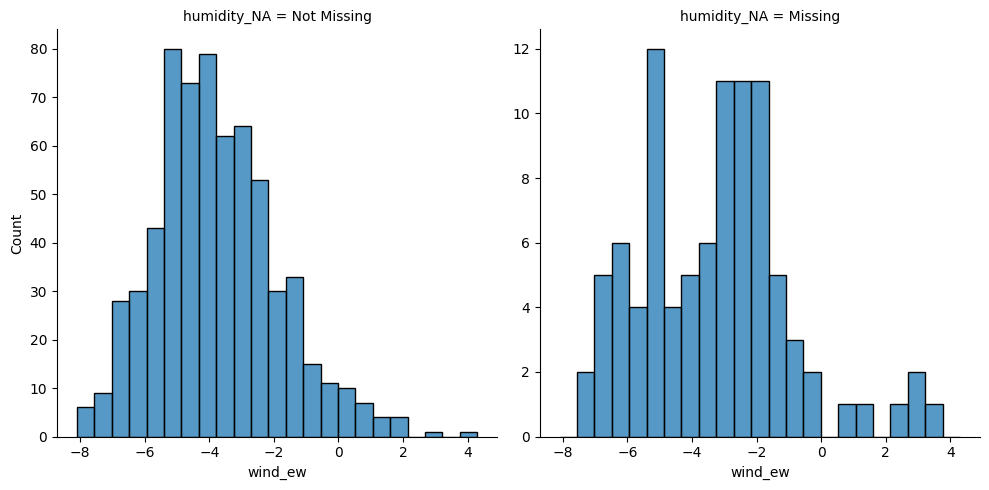

In [33]:
oceanbuoys_df.missing.bind_shadow_matrix(only_missing=True).pipe(lambda df: {sns.displot(data=df, x='wind_ew', col='humidity_NA', facet_kws={'sharey': False})}); # Otra manera de visualizar la matriz de sombras

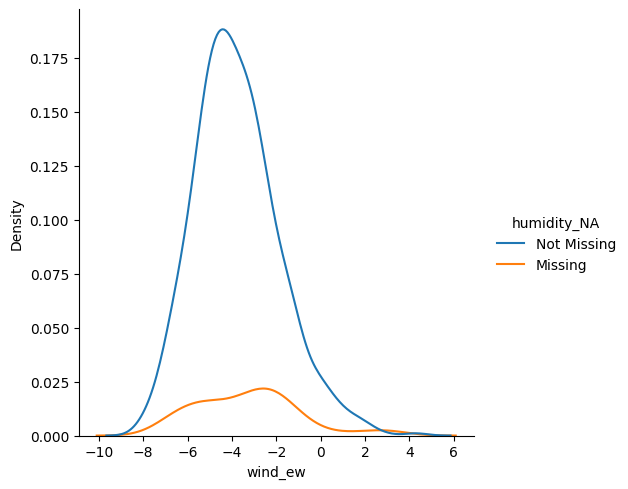

In [34]:
oceanbuoys_df.missing.bind_shadow_matrix(only_missing=True).pipe(lambda df: {sns.displot(data=df, x='wind_ew',hue='humidity_NA', kind='kde')}); # En este grafico podemos observar la distribucion de ambos grupos para la variable wind_ew

In [35]:
oceanbuoys_df.missing.bind_shadow_matrix(only_missing=True).groupby('humidity_NA')['wind_ns'].describe().reset_index() # Agrupamos por valores faltantes y completos de la variable wind_ns y revisamos estadisticos para ambos grupos de la variable wind_ns 

,humidity_NA,count,mean,std,min,25%,50%,75%,max
0,Missing,93.0,1.660215,2.230039,-4.3,0.1,1.9,3.3,6.3
1,Not Missing,643.0,2.776827,2.055698,-6.2,1.6,3.0,4.2,7.3


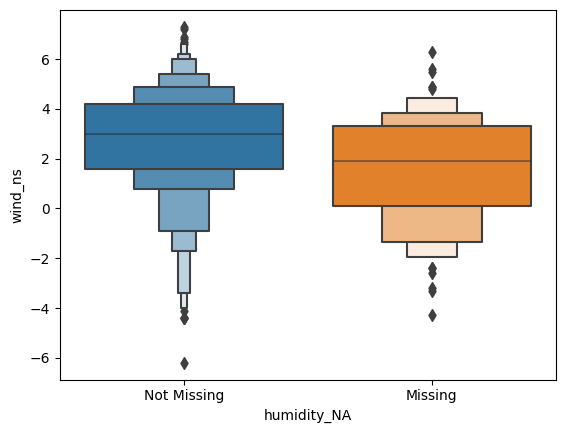

In [36]:
oceanbuoys_df.missing.bind_shadow_matrix(only_missing=True).pipe(lambda df: {sns.boxenplot(data=df, x='humidity_NA', y='wind_ns')}); # Este grafico explica la linea anterior

{<seaborn.axisgrid.FacetGrid at 0x7fd4f17a80d0>}

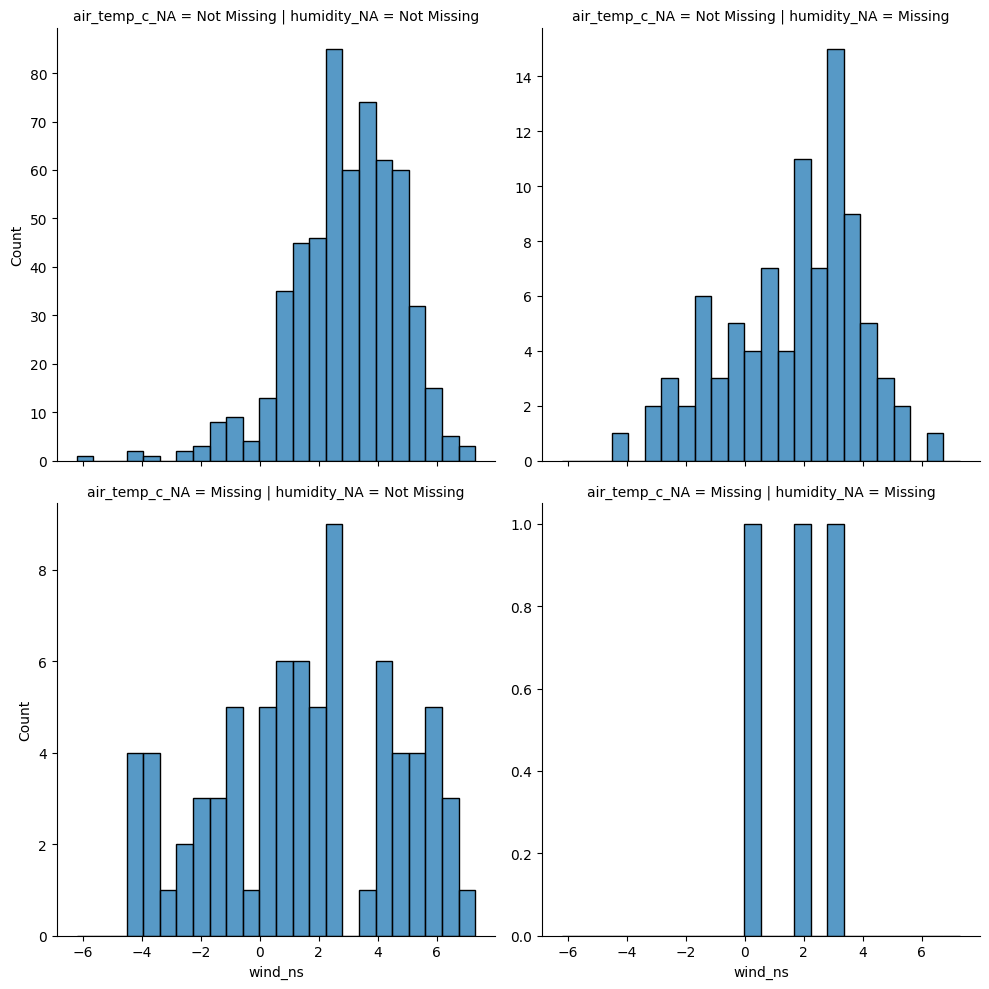

In [37]:
oceanbuoys_df.missing.bind_shadow_matrix(only_missing=True).pipe(lambda df: {sns.displot(data=df, x='wind_ns', col='humidity_NA', row='air_temp_c_NA', facet_kws={'sharey':False})})

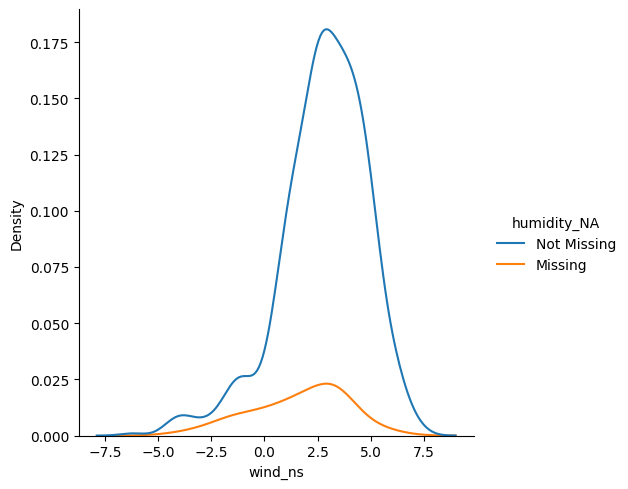

In [38]:
oceanbuoys_df.missing.bind_shadow_matrix(only_missing=True).pipe(lambda df: {sns.displot(data=df, x='wind_ns', hue='humidity_NA', kind='kde')}); # En este grafico podemos observar la distribucion de ambos grupos para la variable wind_ns

## Correlación de nulidad

<Figure size 300x300 with 0 Axes>

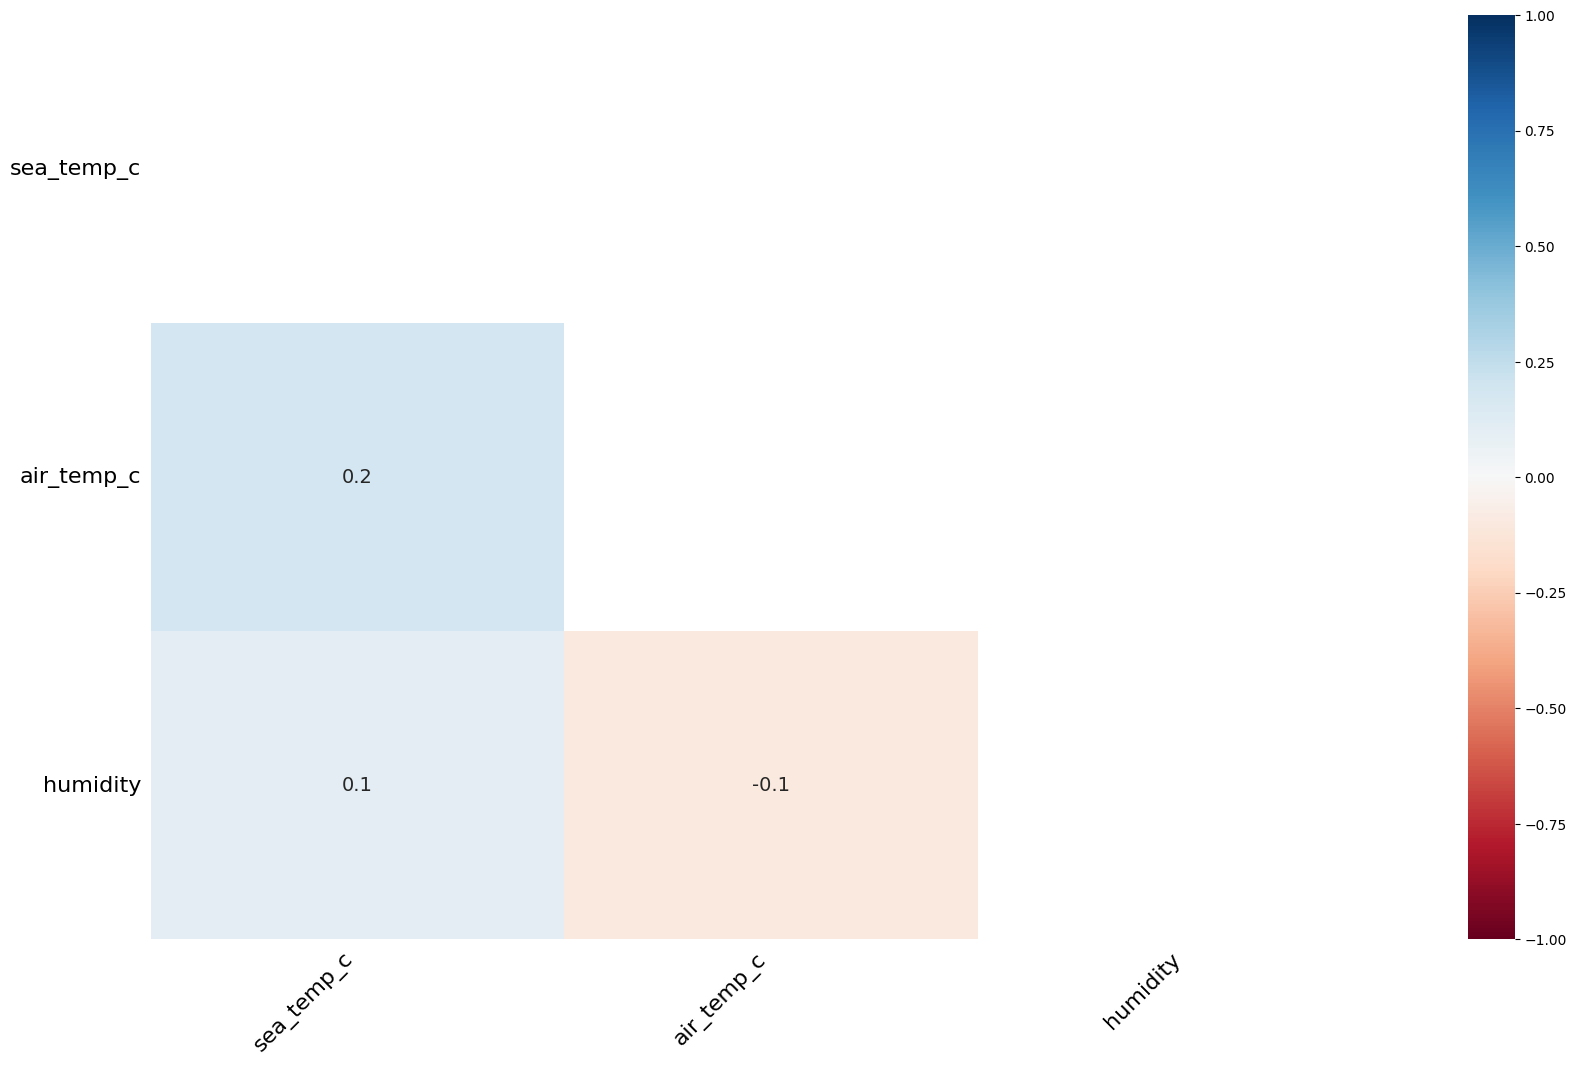

In [39]:
plt.figure(figsize=[3,3])
missingno.heatmap(df=oceanbuoys_df); 

# Tenemos correlacion positiva en dos vias: temp del aire vs temp del oceano y humedad vs temp del oceano, lo que quiere decir que cuando tengo datos faltantes en una, probablemente tenga datos faltantes en la otra variable tambien
# Tenemos correlacion negativa entre la temp del aire y la humedad, lo que quiere decir que lo mas probable es que cuando tenga datos faltantes en una de las variables, tenga datos completos en la otra variable

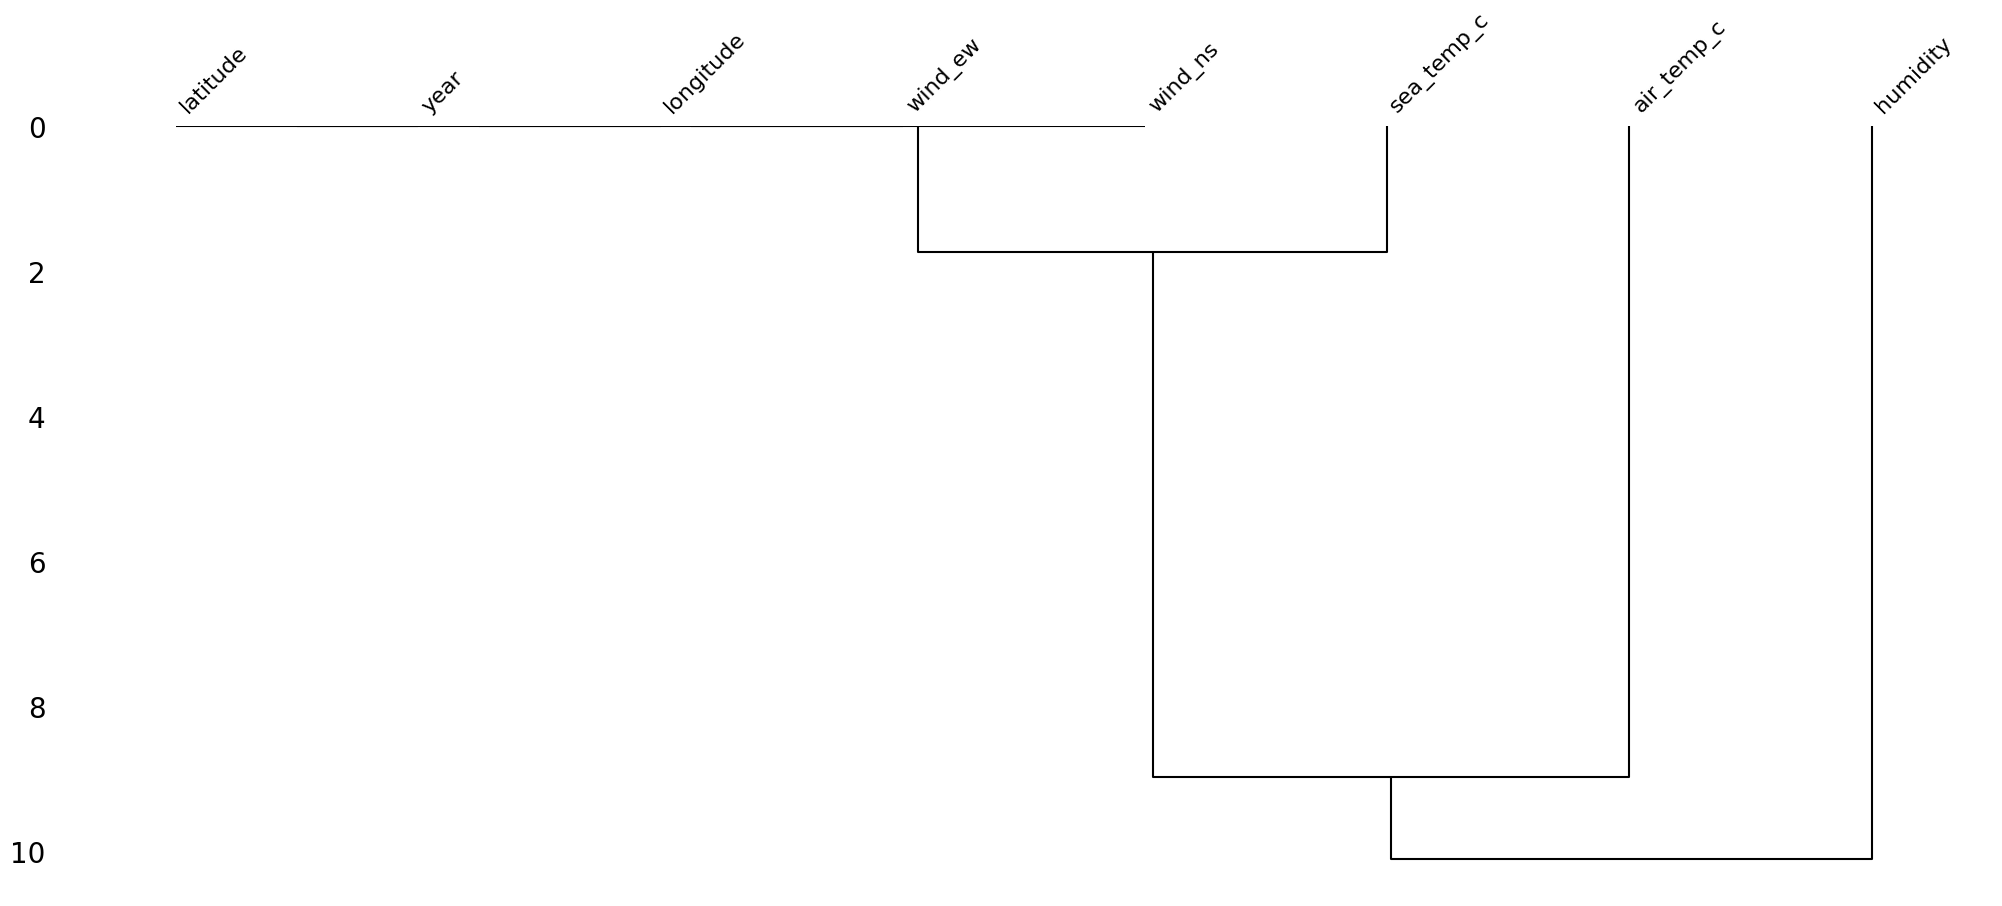

In [40]:
missingno.dendrogram(df=oceanbuoys_df); # La correlacion es positiva entre las variables latitude, longitude, year, wind_ew y wind_ns ya que ninguna posee datos faltantes
# Las variables wind_ew y sea_temp_c guardan cierta correlacion positiva debido a que la variable sea_temp posee muy pocos datos faltantes

## Eliminacion datos faltantes

In [41]:
oceanbuoys_df.shape

(736, 8)

### Eliminacion 1

In [42]:
oceanbuoys_df.dropna(subset=['air_temp_c','sea_temp_c','humidity'], how='all') # Solo eliminamos las observaciones donde esten ausentes los datos en las 3 variables al tiempo, para este caso perdimos solo 2 observaciones

,year,latitude,longitude,sea_temp_c,air_temp_c,humidity,wind_ew,wind_ns
0,1997.0,0.0,-110.0,27.590000,27.150000,79.599998,-6.4,5.4
1,1997.0,0.0,-110.0,27.549999,27.020000,75.800003,-5.3,5.3
2,1997.0,0.0,-110.0,27.570000,27.000000,76.500000,-5.1,4.5
3,1997.0,0.0,-110.0,27.620001,26.930000,76.199997,-4.9,2.5
4,1997.0,0.0,-110.0,27.650000,26.840000,76.400002,-3.5,4.1
...,...,...,...,...,...,...,...,...
731,1993.0,-2.0,-110.0,24.780001,24.620001,90.800003,-4.4,1.7
732,1993.0,-2.0,-110.0,24.879999,24.500000,91.099998,-3.0,0.2
733,1993.0,-2.0,-110.0,25.120001,24.889999,89.699997,-4.0,1.1
734,1993.0,-2.0,-110.0,25.160000,24.930000,89.500000,-4.3,2.5


<AxesSubplot:>

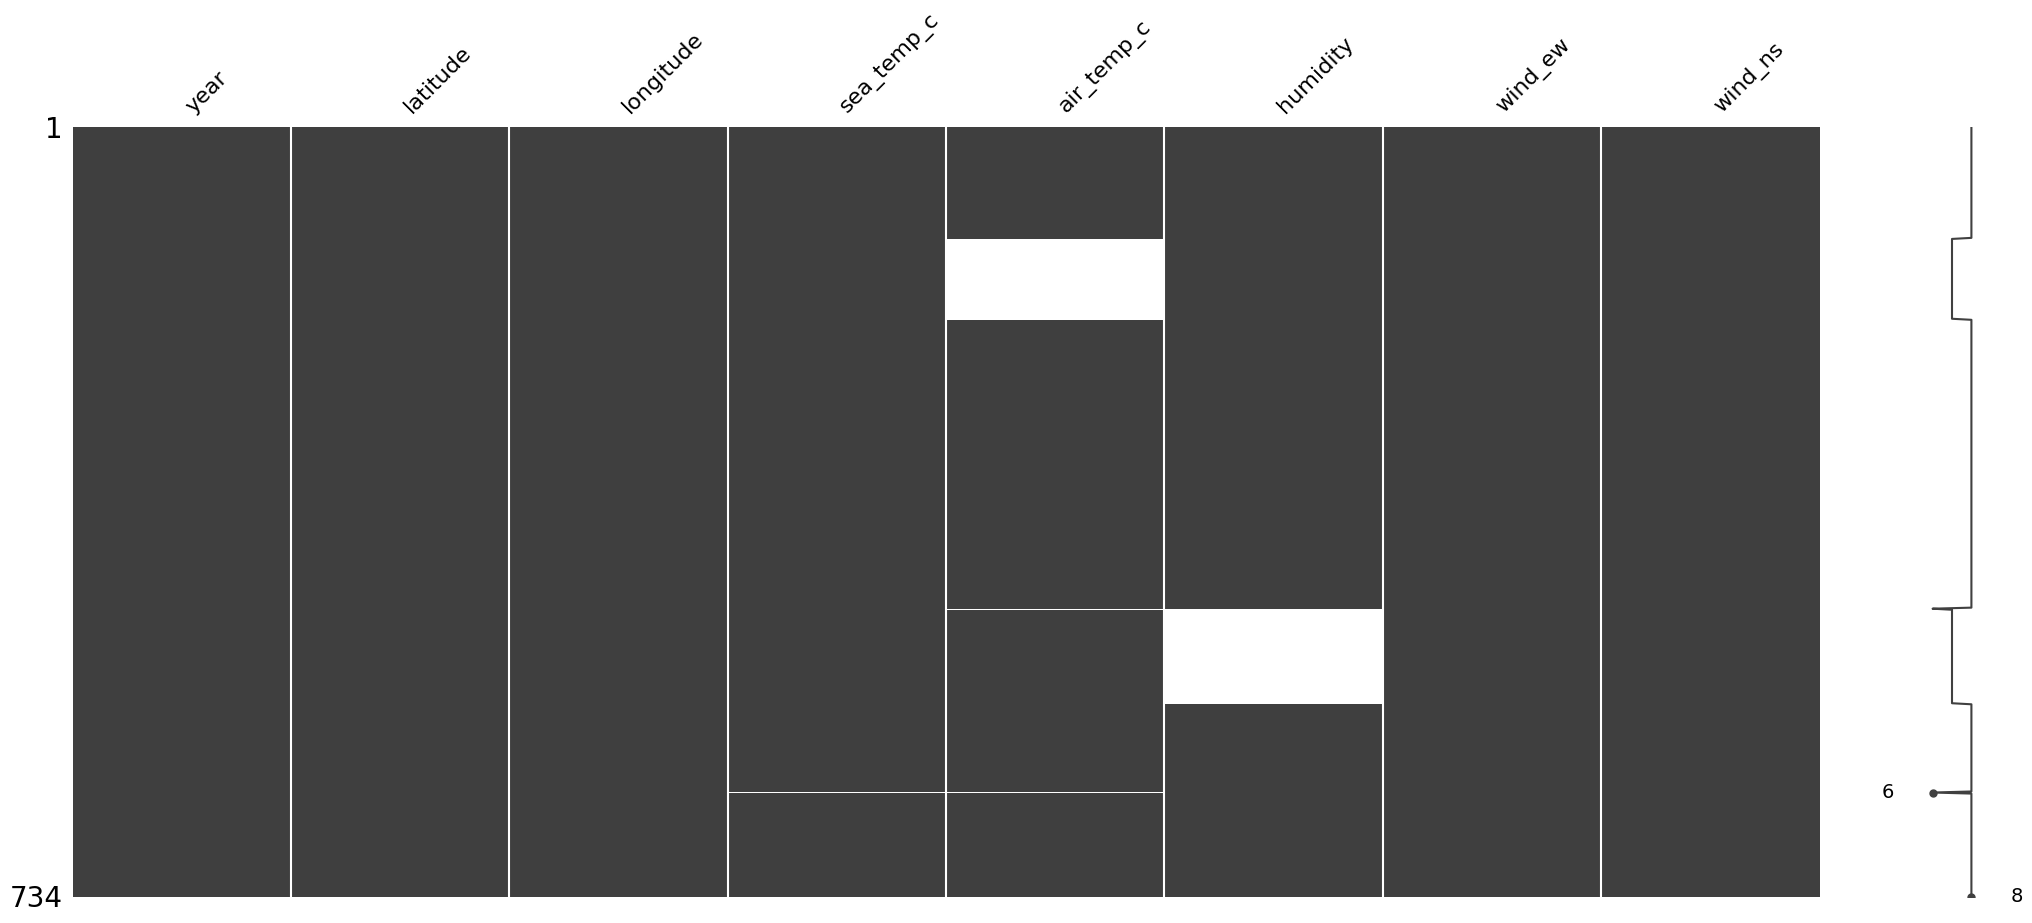

In [43]:
oceanbuoys_df.dropna(subset=['air_temp_c','sea_temp_c','humidity'], how='all').pipe(missingno.matrix) # Aun tenemos variables con datos faltantes

### Eliminacion 2

In [44]:
oceanbuoys_df.dropna(subset=['air_temp_c','sea_temp_c','humidity'], how='any') # Eliminas todas las observaciones que tengan al menos un dato faltante en alguna de las 3 variables, para este caso perdimos 171 observaciones

,year,latitude,longitude,sea_temp_c,air_temp_c,humidity,wind_ew,wind_ns
0,1997.0,0.0,-110.0,27.590000,27.150000,79.599998,-6.4,5.4
1,1997.0,0.0,-110.0,27.549999,27.020000,75.800003,-5.3,5.3
2,1997.0,0.0,-110.0,27.570000,27.000000,76.500000,-5.1,4.5
3,1997.0,0.0,-110.0,27.620001,26.930000,76.199997,-4.9,2.5
4,1997.0,0.0,-110.0,27.650000,26.840000,76.400002,-3.5,4.1
...,...,...,...,...,...,...,...,...
731,1993.0,-2.0,-110.0,24.780001,24.620001,90.800003,-4.4,1.7
732,1993.0,-2.0,-110.0,24.879999,24.500000,91.099998,-3.0,0.2
733,1993.0,-2.0,-110.0,25.120001,24.889999,89.699997,-4.0,1.1
734,1993.0,-2.0,-110.0,25.160000,24.930000,89.500000,-4.3,2.5


<AxesSubplot:>

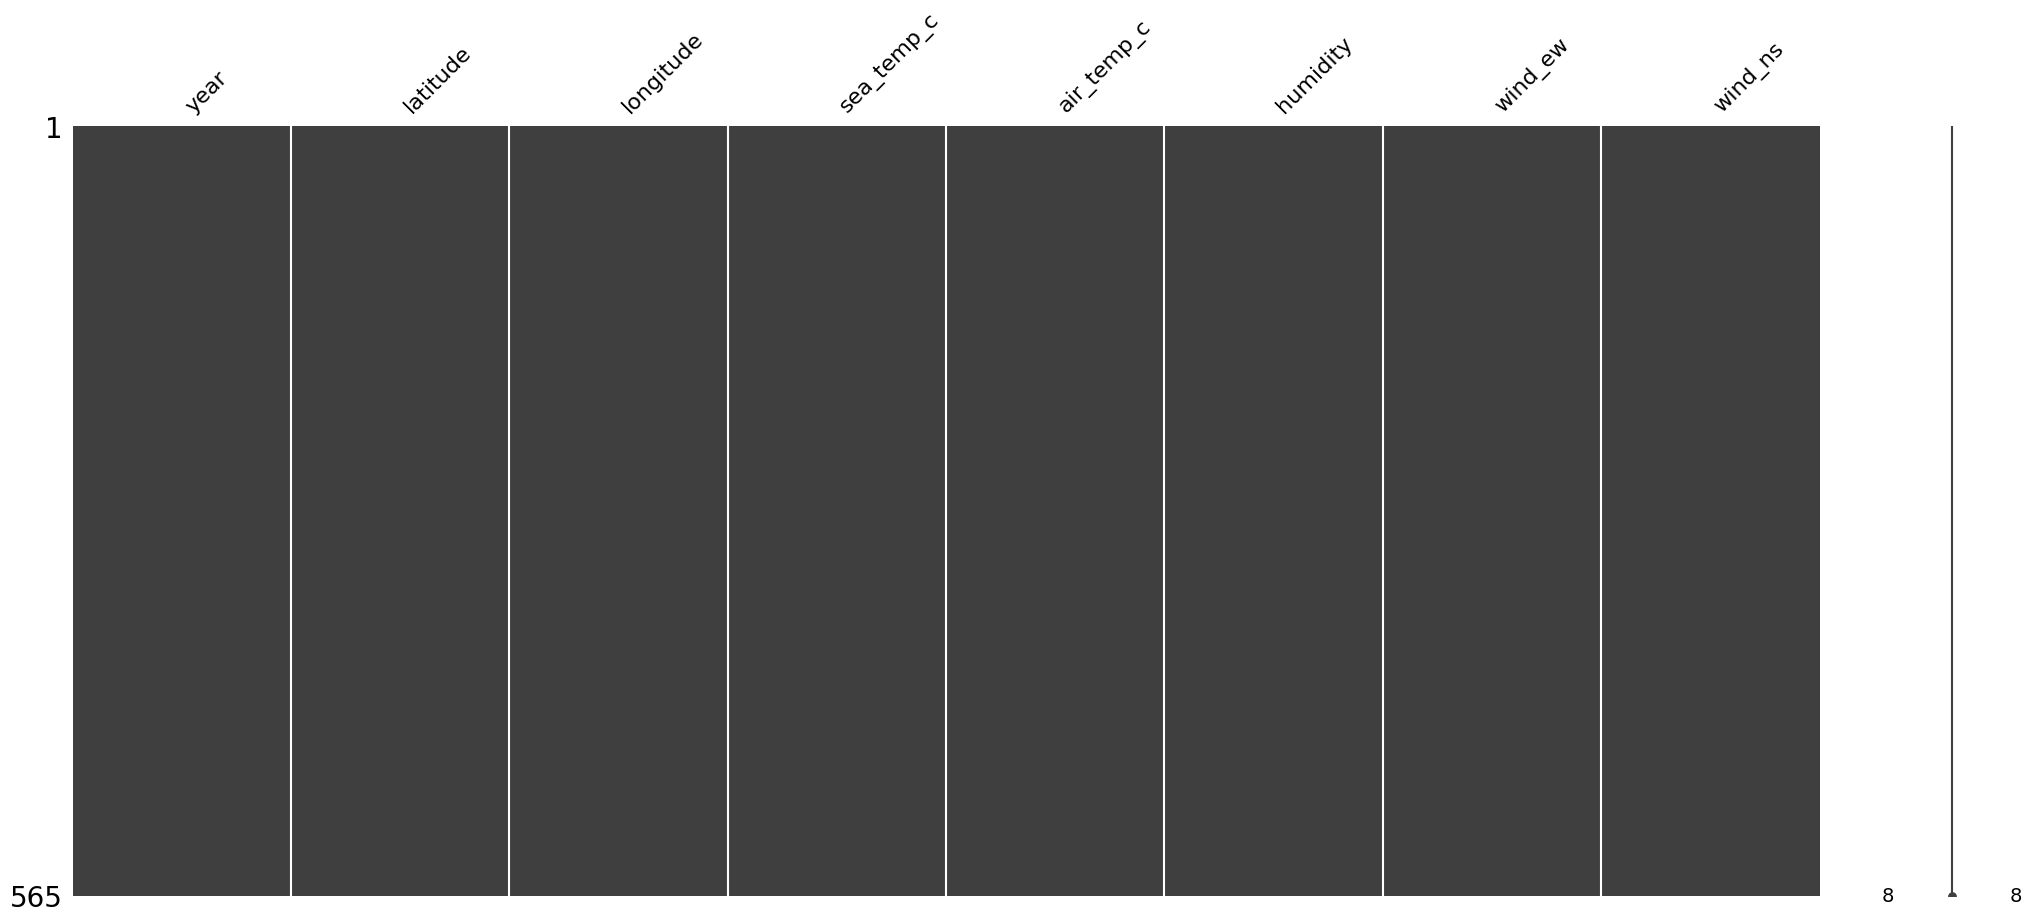

In [45]:
oceanbuoys_df.dropna(subset=['air_temp_c','sea_temp_c','humidity'], how='any').pipe(missingno.matrix) # No tenemos datos faltantes en ninguna variable

## Imputacion basica

### Visualizacion de una imputación

{<seaborn.axisgrid.FacetGrid at 0x7fd4c6020880>}

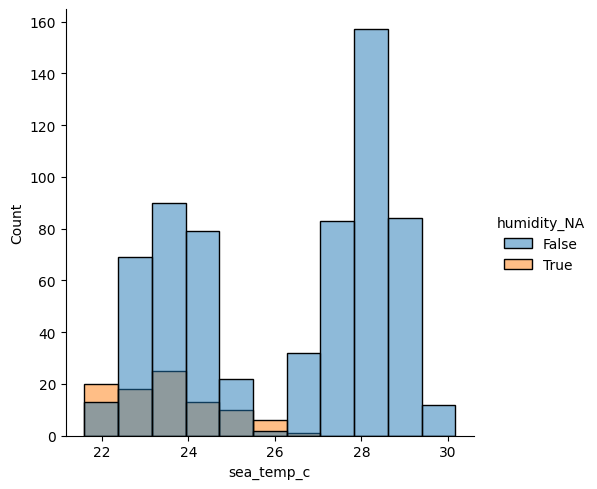

In [46]:
oceanbuoys_df.select_columns('air_temp_c','sea_temp_c','humidity').missing.bind_shadow_matrix(true_string=True, false_string=False).apply(axis='rows', func= lambda column: column.fillna(column.mean()) if '_NA' not in column.name else column).pipe(lambda df: {sns.displot(data=df, x='sea_temp_c',hue='humidity_NA')})

# Asi se ven los datos de la variable sea_temp_c con los datos imputados, True son los valores que estaban missing y ahora han sido imputados

### Visualización múltiple de imputaciones

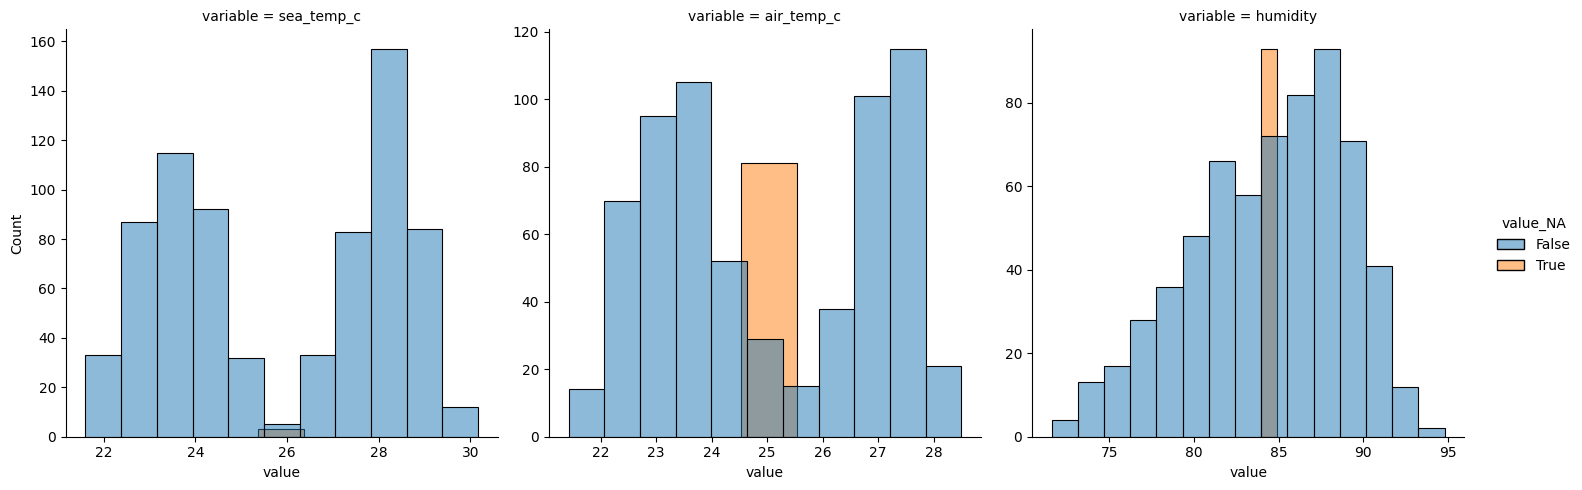

In [64]:
oceanbuoys_df.select_columns('sea_temp_c','air_temp_c','humidity').missing.bind_shadow_matrix(true_string=True, false_string=False).apply(axis='rows', func= lambda column: column.fillna(column.mean()) if '_NA' not in column.name else column).pivot_longer(index='*_NA').pivot_longer(index=['variable', 'value'],names_to='variable_NA', values_to='value_NA').assign(valid=lambda df: df.apply(axis='columns', func=lambda column: column.variable in column.variable_NA)).query('valid').pipe(lambda df: sns.displot(data=df,x='value',hue='value_NA', col='variable', common_bins=False, facet_kws={'sharex': False, 'sharey':False}))